In [ ]:
# Description : This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [3]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-1-31')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.706757
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,142.946396
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,141.848038
2021-01-28,141.990005,136.699997,139.520004,137.089996,142621100.0,136.885452
2021-01-29,136.740005,130.210007,135.830002,131.960007,177180600.0,131.763107


In [7]:
# Get the no of rows and columns in the data set
df.shape

(2284, 6)

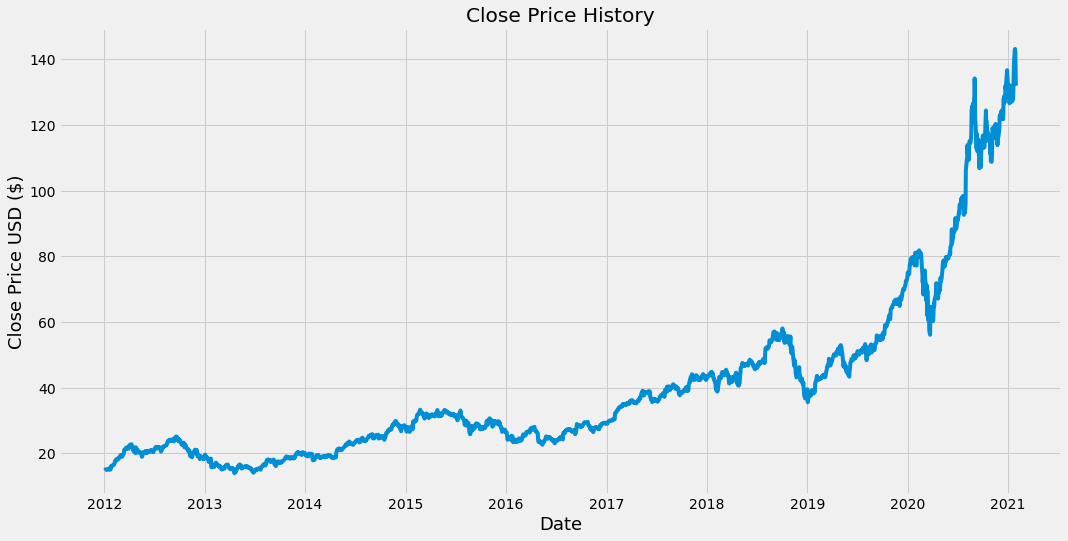

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [12]:
# Create a new dataframe with only 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1828

In [13]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.99148684],
       [0.95302307],
       [0.91332111]])

In [15]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i <= 60:
    print(x_train)
    print(y_train)
    print()



[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]



In [16]:
# Convert the x_train and y-train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#Reshape the data (Because LSTM model requires three dimensional data and now x and y_tarin data is two dimentional)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1768, 60, 1)

In [19]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1768/1768 [==============================] - 41s 22ms/step - loss: 3.0193e-04


In [28]:
#Create the testing data set
#Create a new array containing scaled values from index 1768 to 2284
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [30]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [31]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#Get the root mean squared error (RMSE) for evaluation of model
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

8.73212602682281

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


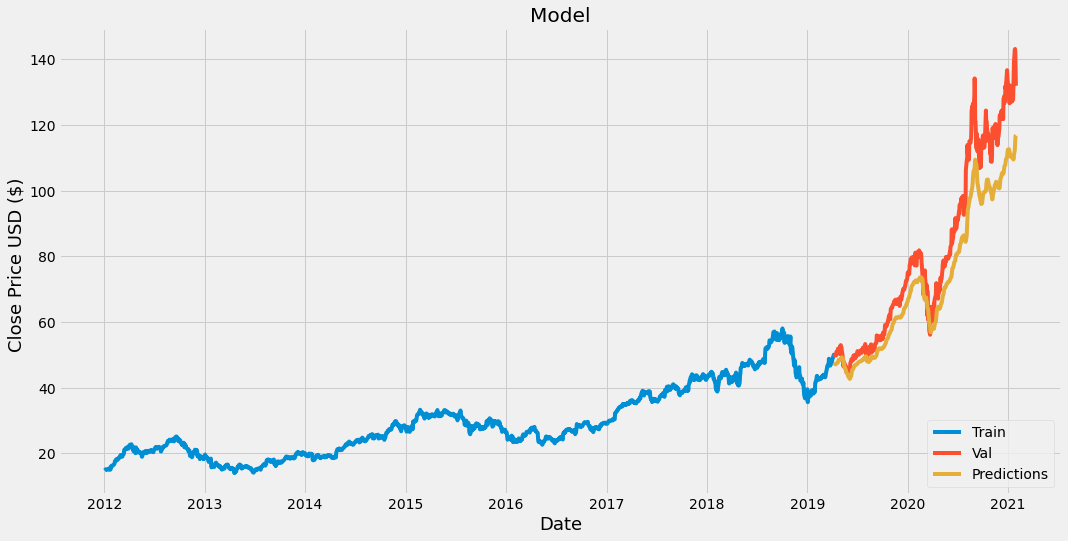

In [37]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($) ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [38]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-04-10,50.154999,46.634205
2019-04-11,49.737499,46.893253
2019-04-12,49.717499,47.050632
2019-04-15,49.807499,47.141167
2019-04-16,49.812500,47.202217
...,...,...
2021-01-25,142.919998,112.287285
2021-01-26,143.160004,114.066681
2021-01-27,142.059998,115.662170


In [43]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01',end='2021-01-31')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append past 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert the X_test to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[115.95031]]


In [44]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-02-01',end='2021-02-1')
print(apple_quote2['Close'])

Date
2021-02-01    134.139999
Name: Close, dtype: float64
